# Image Classification using CNN

##  Load & Explore the Dataset:

*  CIFAR-10, which contains 60,000 images in 10 classes (airplane, car, bird, etc.).

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
Train: (50000, 32, 32, 3), Test: (10000, 32, 32, 3)


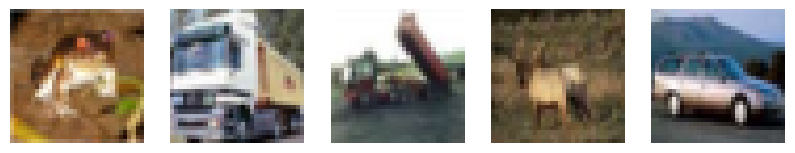

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

# Print dataset shape
print(f"Train: {X_train.shape}, Test: {X_test.shape}")

# Display sample images
fig, axes = plt.subplots(1, 5, figsize=(10, 5))
for i in range(5):
    axes[i].imshow(X_train[i])
    axes[i].axis('off')
plt.show()


 ## Preprocess the Data

* Convert pixel values from 0-255 to 0-1 (Normalization).
*  Convert labels to one-hot encoding

In [2]:
# Normalize pixel values
X_train, X_test = X_train / 255.0, X_test / 255.0

# Convert labels to categorical (one-hot encoding)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


### Build a CNN Model
* I have used Conv2D, MaxPooling, Flatten, Dense layers to build a CNN.

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Show model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

### Train the Model

In [4]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 72s 89ms/step - accuracy: 0.2969 - loss: 1.8823 - val_accuracy: 0.5261 - val_loss: 1.3259
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 87ms/step - accuracy: 0.4877 - loss: 1.4209 - val_accuracy: 0.5973 - val_loss: 1.1496
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 91ms/step - accuracy: 0.5483 - loss: 1.2724 - val_accuracy: 0.6239 - val_loss: 1.0723
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 81ms/step - accuracy: 0.5780 - loss: 1.1736 - val_accuracy: 0.6274 - val_loss: 1.0599
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 84ms/step - accuracy: 0.6110 - loss: 1.1090 - val_accuracy: 0.6663 - val_loss: 0.9714
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 86ms/step - accuracy: 0.6277 - loss: 1.0538 - val_accuracy: 0.6733 - val_loss: 0.9457
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 62s 80ms/step - accuracy: 0.6465 - loss: 1.0082 - val_accuracy: 0.6817 - val_loss: 0.9091
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 64s 82ms/step - accuracy: 0.6600 - loss: 0.9569 - 

### Evaluate & Make Predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7029 - loss: 0.8563
Test Accuracy: 0.7001
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


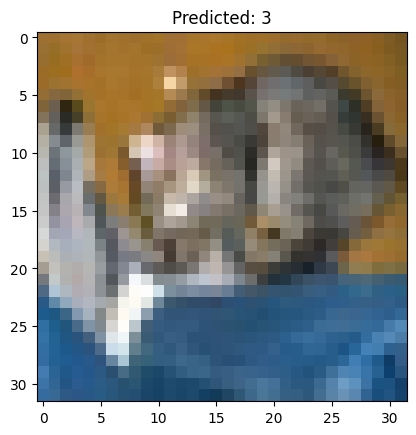

In [5]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Make predictions
predictions = model.predict(X_test)

# Show a sample prediction
plt.imshow(X_test[0])
plt.title(f"Predicted: {np.argmax(predictions[0])}")
plt.show()


### Use Pre-Trained VGG16

* VGG16 is a deep CNN with 16 layers, known for capturing hierarchical features

In [6]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout

# Load the pre-trained VGG16 model without the top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(10, activation='softmax')(x)

# Create final model
model_vgg16 = Model(inputs=base_model.input, outputs=x)

# Compile the model
model_vgg16.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_vgg16 = model_vgg16.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)

# Evaluate model
test_loss, test_acc = model_vgg16.evaluate(X_test, y_test)
print(f"VGG16 Test Accuracy: {test_acc:.4f}")


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 749s 956ms/step - accuracy: 0.3945 - loss: 1.7096 - val_accuracy: 0.5472 - val_loss: 1.2944
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 737s 942ms/step - accuracy: 0.5347 - loss: 1.3264 - val_accuracy: 0.5702 - val_loss: 1.2257
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 718s 911ms/step - accuracy: 0.5610 - loss: 1.2587 - val_accuracy: 0.5838 - val_loss: 1.1861
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 767s 943ms/step - accuracy: 0.5785 - loss: 1.2100 - val_accuracy: 0.5845 - val_loss: 1.1785
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 706s 898ms/step - accuracy: 0.5850 - loss: 1.1885 - val_accuracy: 0.5988 - val_loss: 1.1598
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 771s 935ms/step - accuracy: 0.5906 - loss: 1.1681 - val_accuracy: 0.5976 - val_loss: 1.1470
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 739s 946ms/step - accuracy: 0.6014 - loss: 1.1509 - val_accuracy: 0.6005 - val_loss: 1.1310
Epoch 8/10
782/782 ━━━━━━

 ### Use Pre-Trained ResNet50

* ResNet50 is a deep CNN with 50 layers and skip connections, making training efficient.

In [4]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout

# Load the pre-trained ResNet50 model without the top layer
base_model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze base model layers
for layer in base_model_resnet.layers:
    layer.trainable = False

# Add custom layers
x = Flatten()(base_model_resnet.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(10, activation='softmax')(x)

# Create final model
model_resnet = Model(inputs=base_model_resnet.input, outputs=x)

# Compile the model
model_resnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_resnet = model_resnet.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)

# Evaluate model
test_loss, test_acc = model_resnet.evaluate(X_test, y_test)
print(f"ResNet50 Test Accuracy: {test_acc:.4f}")


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 25ms/step - accuracy: 0.1024 - loss: 2.3678 - val_accuracy: 0.1001 - val_loss: 2.3026
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.0990 - loss: 2.3028 - val_accuracy: 0.1001 - val_loss: 2.3026
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.0981 - loss: 2.3027 - val_accuracy: 0.1002 - val_loss: 2.3026
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.0986 - loss: 2.3025 - val_accuracy: 0.1008 - val_loss: 2.3024
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.1124 - loss: 2.2885 - val_accuracy: 0.1706 - val_loss: 2.2205
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.1298 - loss: 2.2562 - val_accuracy: 0.1540 - val_loss: 2.2363
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.1314 - loss: 2.2472 - val_accuracy: 0.1726 - val_loss: 2.1879
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.1339 - loss: 2.2441 - va